In [19]:
pip install ucimlrepo

In [20]:
# Importar librería
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # Corrected import
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.ensemble import RandomForestClassifier



# Cargar dataset (ID 697)
dataset = fetch_ucirepo(id=697)

# Obtener los datos como DataFrame de pandas
x = dataset.data.features
y = dataset.data.targets

print(x.shape)
print(y.shape)

counts = y.value_counts()
print(counts)
#meto dentro de dropout a enrrolled para que sea binario

y = y.replace('Enrolled','Dropout')
counts = y.value_counts()
print(counts)

(4424, 36)
(4424, 1)
Target  
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64
Target  
Dropout     2215
Graduate    2209
Name: count, dtype: int64


In [21]:
#Catalogar cada predictor (feature) en ordinales y nominales
ordinales = [
    "Curricular units 1st sem (approved)",
    "Curricular units 1st sem (grade)",
    "Curricular units 1st sem (evaluations)",
    "Curricular units 1st sem (without evaluations)",
    "Curricular units 2nd sem (approved)",
    "Curricular units 2nd sem (grade)",
    "Curricular units 2nd sem (evaluations)",
    "Curricular units 2nd sem (without evaluations)",
    "Curricular units 2nd sem (credited)",
    "Admission grade",
    "Previous qualification (grade)",
    "Age at enrollment",
    "Application order",
    "Curricular units 1st sem (enrolled)",
    "Curricular units 2nd sem (enrolled)",
    "GDP",
    "Unemployment rate",
    "Inflation rate"
]

nominales = [
    "Course",
    "Gender",
    "Marital Status",
    "Application mode",
    "Daytime/evening attendance",
    "Previous qualification",
    "Nacionality",
    "Mother's qualification",
    "Father's qualification",
    "Mother's occupation",
    "Father's occupation",
    "Displaced",
    "Educational special needs",
    "Debtor",
    "Tuition fees up to date",
    "Scholarship holder",
    "International"
]


x_ord = x[ordinales]
x_nom = x[nominales]

print(x_ord.shape)  #(4424, 15)
print(x_nom.shape) #(4424, 18)

#Le aplico el onehotencoder a las nominales para poder usarlas luego
encoder = OneHotEncoder(drop='if_binary', sparse_output=False)

x_nom_encoded = encoder.fit_transform(x_nom)

display(x_nom_encoded)


(4424, 18)
(4424, 17)


array([[0., 1., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 0., 1.]])

In [22]:
x_data = np.concatenate((x_ord, x_nom_encoded), axis=1)
print(x_data.shape)
print(y.shape)
#armo el set de entrenamiento y de prueba
x_train, x_test, y_train, y_test= train_test_split(x_data , y , train_size = 0.75, test_size = 0.25)

(4424, 246)
(4424, 1)


**Arbol de decision**

El **árbol de decisión** es un modelo de aprendizaje supervisado que permite realizar tareas de **clasificación** o **regresión** mediante una estructura jerárquica en forma de árbol.  
Cada nodo representa una **pregunta o condición sobre una variable**, y cada rama representa una posible respuesta, hasta llegar a una **hoja**, que indica una clase o valor final.

El objetivo del algoritmo es **dividir el espacio de los datos** en regiones cada vez más homogéneas con respecto a la variable objetivo.  
En cada nodo, el modelo elige la característica y el umbral de corte que mejor separan las clases, utilizando un **criterio de impureza**, como la *entropía* o el *índice de Gini*.

La idea es maximizar la pureza de las hojas, es decir, que cada grupo final contenga, idealmente, solo ejemplos de una misma clase.

**Manejo de la impureza**

Un nodo es **puro** si todos los elementos pertenecen a una sola clase.  
Para medir cuán mezclado está un nodo, se utilizan funciones de impureza.

- **Entropía:**

$$
H(S) = - \sum_{i=1}^{k} p_i \log_2(p_i)
$$



donde \( p_i \) es la proporción de ejemplos de la clase \( i \) en el nodo.

El algoritmo busca las divisiones que **minimicen la impureza total**, es decir, que generen nodos más homogéneos.

**Funcionamiento:**

1. El algoritmo evalúa todas las características y posibles umbrales.  
2. Calcula la reducción de impureza que produciría cada división.  
3. Selecciona la mejor división y repite el proceso de manera recursiva para cada rama.  
4. Se detiene cuando:
   - los nodos son completamente puros,
   - o se alcanza una profundidad máxima definida por el usuario.

**Ventajas:**

-  **Fácil interpretación:** el árbol puede visualizarse y entenderse fácilmente.  
-  **No requiere escalado de datos:** no depende de la magnitud de las variables.  
-  **Maneja variables numéricas y categóricas.**  
-  **Permite conocer la importancia de las variables** (*Feature Importance*), indicando cuáles influyen más en la decisión final.

**Limitaciones**

- Puede tener overfitting a los datos de entrenamiento , especialmente si el árbol es muy profundo.  
- Tiene **alta varianza**, es decir, pequeñas variaciones en los datos pueden producir árboles muy diferentes.  


In [23]:
arbol = DecisionTreeClassifier(criterion='entropy')
arbol.fit(x_train, y_train)

#Get feature names from original dataframes
ordinal_feature_names = x_ord.columns.tolist()
nominal_feature_names = encoder.get_feature_names_out(nominales).tolist()
all_feature_names = ordinal_feature_names + nominal_feature_names

# Mostrar texto del árbol
r = tree.export_text(arbol, feature_names=all_feature_names, max_depth = 3)
print(r)

display(arbol)

|--- Curricular units 2nd sem (approved) <= 4.50
|   |--- Curricular units 2nd sem (approved) <= 3.50
|   |   |--- Curricular units 1st sem (enrolled) <= 0.50
|   |   |   |--- Previous qualification (grade) <= 136.50
|   |   |   |   |--- truncated branch of depth 7
|   |   |   |--- Previous qualification (grade) >  136.50
|   |   |   |   |--- truncated branch of depth 10
|   |   |--- Curricular units 1st sem (enrolled) >  0.50
|   |   |   |--- Curricular units 2nd sem (approved) <= 2.50
|   |   |   |   |--- truncated branch of depth 6
|   |   |   |--- Curricular units 2nd sem (approved) >  2.50
|   |   |   |   |--- truncated branch of depth 12
|   |--- Curricular units 2nd sem (approved) >  3.50
|   |   |--- Tuition fees up to date_1 <= 0.50
|   |   |   |--- International_1 <= 0.50
|   |   |   |   |--- class: Dropout
|   |   |   |--- International_1 >  0.50
|   |   |   |   |--- truncated branch of depth 2
|   |   |--- Tuition fees up to date_1 >  0.50
|   |   |   |--- Curricular units 

DecisionTreeClassifier(criterion='entropy')

Utilizando el comando DecisionTreeClassifier de sklearn, se entrenó un árbol de clasificación maximal empleando entropía como función de impureza.

La condición de la raíz del árbol corresponde a la variable "Curricular units 2nd sem (approved)", que representa la cantidad de materias aprobadas en el segundo semestre. Este atributo es el primero en dividir el conjunto de datos, indicando que es el que más reduce la entropía inicial, es decir, el que mejor separa los casos de estudiantes que se gradúan de los que abandonan.

Los primeros nodos del árbol también se relacionan con variables académicas y administrativas relevantes, como:

"Curricular units 2nd sem (enrolled)", que indica la cantidad de materias en las que el estudiante se inscribió en el segundo semestre.

"Admission grade", que refleja el rendimiento inicial al ingresar a la carrera.

"Tuition fees up to date", que informa si el estudiante tiene las cuotas al día.

En conjunto, estas divisiones iniciales muestran que el rendimiento académico temprano y la situación administrativa son los factores más determinantes en la predicción de deserción o graduación.

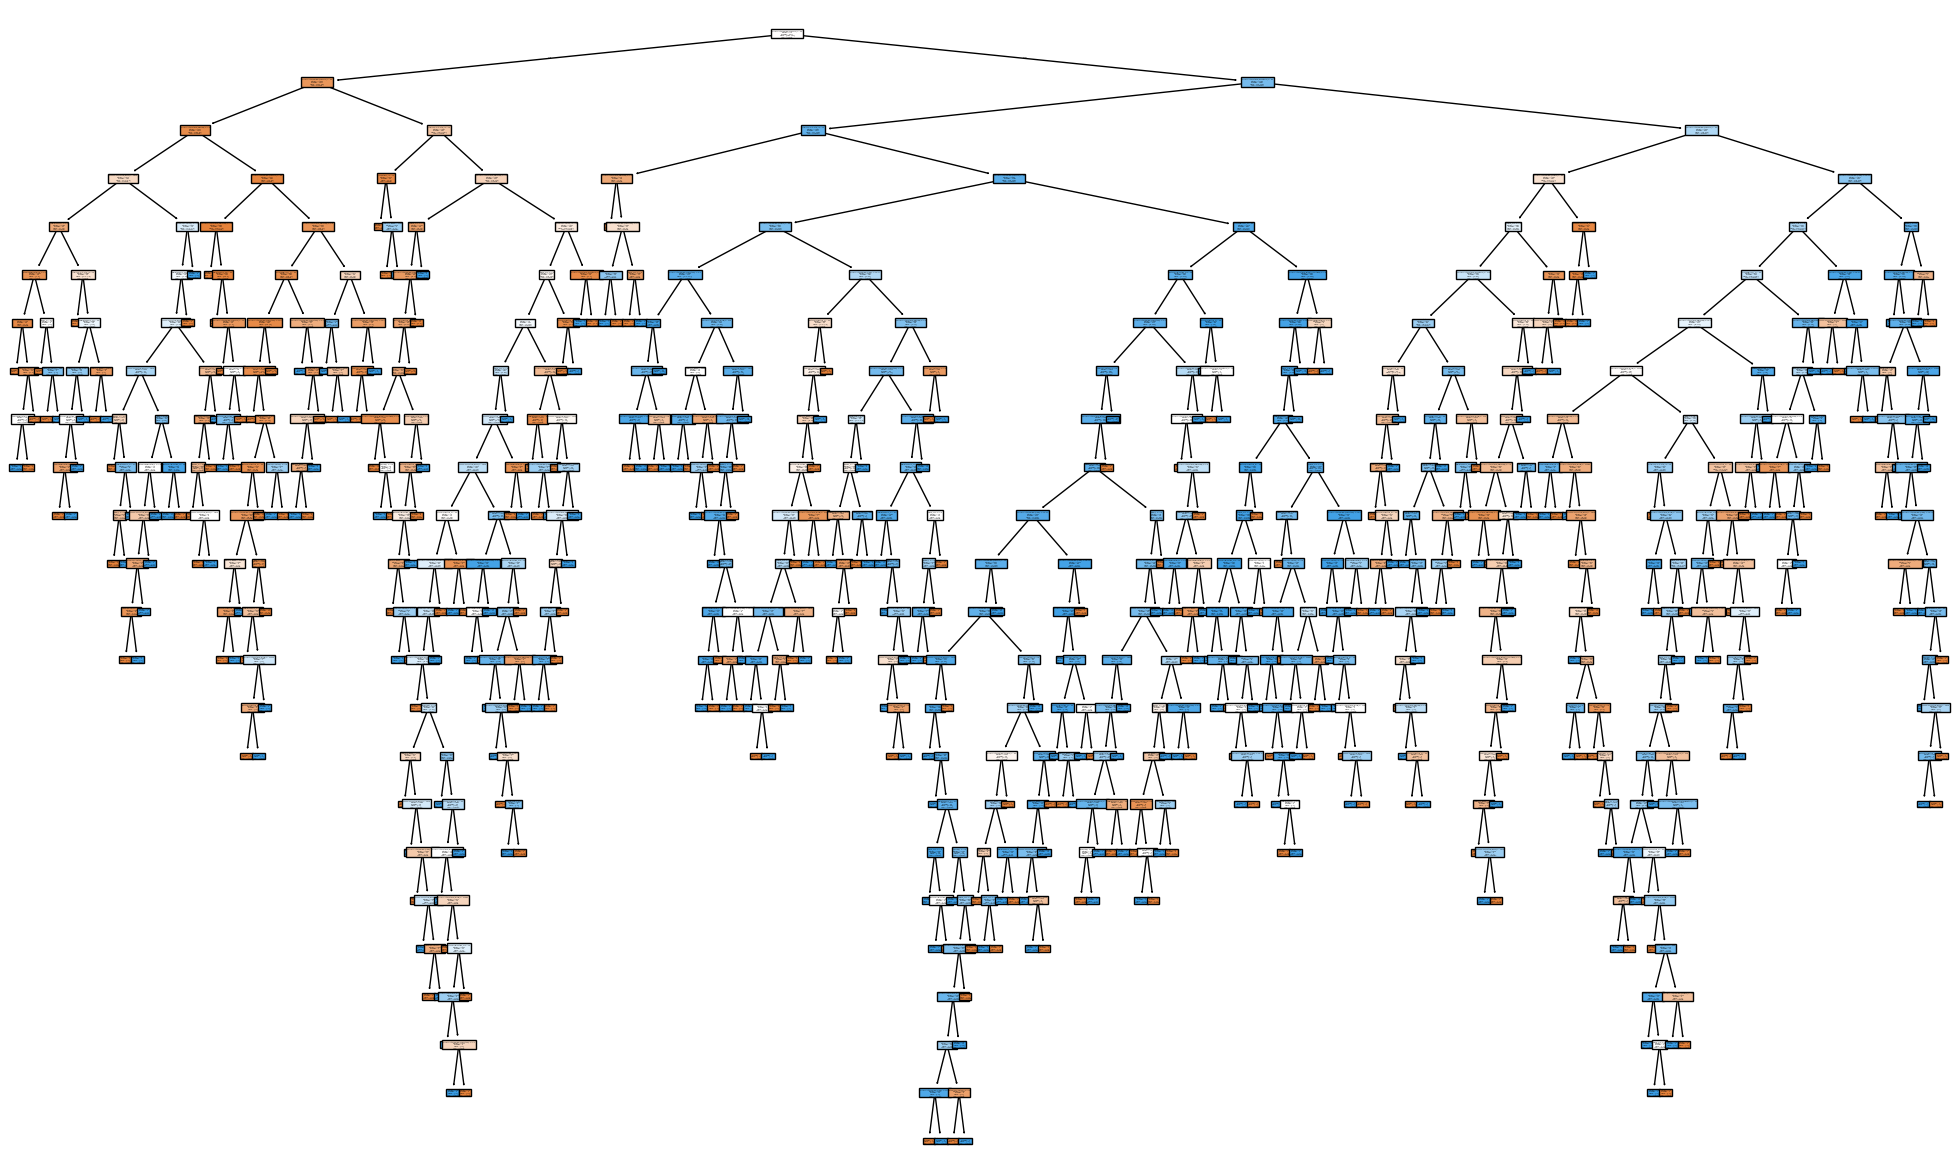

Cantidad total de nodos: 799
Cantidad de hojas: 400


In [24]:
plt.figure(figsize=(25,15))
plot_tree(arbol, feature_names=all_feature_names, class_names=['Dropout', 'Graduate'], filled=True) #
plt.show()
# Cantidad de nodos totales
num_nodos = arbol.tree_.node_count

# Cantidad de hojas (nodos terminales)
num_hojas = sum(arbol.tree_.children_left == -1) #si es -1 significa que no tiene hijos → es una hoja

print(f"Cantidad total de nodos: {num_nodos}")
print(f"Cantidad de hojas: {num_hojas}")




In [25]:
#funcion para calcular accuracy, matriz de confusion y macro-F1 reutilizo del tp pasado
def calculo_merito(y_pred, y_test):
   # y_pred = modelo.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    return f1, acc

In [26]:
def calculo_importantes(modelo, feature_names):
    importances = modelo.feature_importances_
    indices = np.argsort(importances)[::-1]
    print("Features mas importanes")
    print(all_feature_names[indices[0]] , importances[indices[0]])
    print(all_feature_names[indices[1]] , importances[indices[1]])


In [35]:
y_pred = arbol.predict(x_test) #predice Dropout o Graduate
#El árbol va recorriendo estas reglas hasta llegar a una hoja, y la clase asignada a esa hoja es la predicción para esa fila.
f1 , acc = calculo_merito(y_pred, y_test)
print(f"Accuracy: {acc}")
print(f"F1 macro: {f1}")

# Feature importances

calculo_importantes(arbol, all_feature_names)



Accuracy: 0.7992766726943942
F1 macro: 0.7992661702524256
Features mas importanes
Curricular units 2nd sem (approved) 0.3696139535102769
Curricular units 1st sem (enrolled) 0.04241661752362486


### Poda

La **poda** es una técnica utilizada para reducir el tamaño de un árbol de decisión, eliminando aquellas ramas que aportan poca o ninguna mejora en la capacidad predictiva del modelo.  
Su objetivo principal es overfitting, es decir, que el árbol aprenda detalles o ruido específicos del conjunto de entrenamiento y pierda capacidad de generalización sobre datos nuevos.

En este caso, el método utilizado es la poda por complejidad de costo (*Cost Complexity Pruning*).  
Esta técnica define una medida de costo total para un árbol \( T \):

$$
R_\alpha(T) = R(T) + \alpha \times |T|
$$

donde:

-  R(T) : error del árbol sobre los datos de entrenamiento.  
- |T|: número de hojas (complejidad del árbol).  
- $\alpha$: parámetro de penalización que controla el equilibrio entre exactitud y simplicidad.


\begin{cases}
\alpha = 0 & \Rightarrow \text{El árbol crece sin restricción y tiende a sobreajustar.} \\
\alpha > 0 & \Rightarrow \text{Se penalizan los árboles grandes y se eliminan ramas, obteniendo un modelo más simple.}
\end{cases}


El procedimiento consiste en calcular una secuencia de valores posibles de $\alpha$ mediante el método cost_complexity_pruning_path().  
Luego se reentrena el modelo con distintos valores de ccp_alpha y se selecciona el que maximiza el rendimiento en validación (por ejemplo, la *accuracy* o el *F1-score*).


(223,)


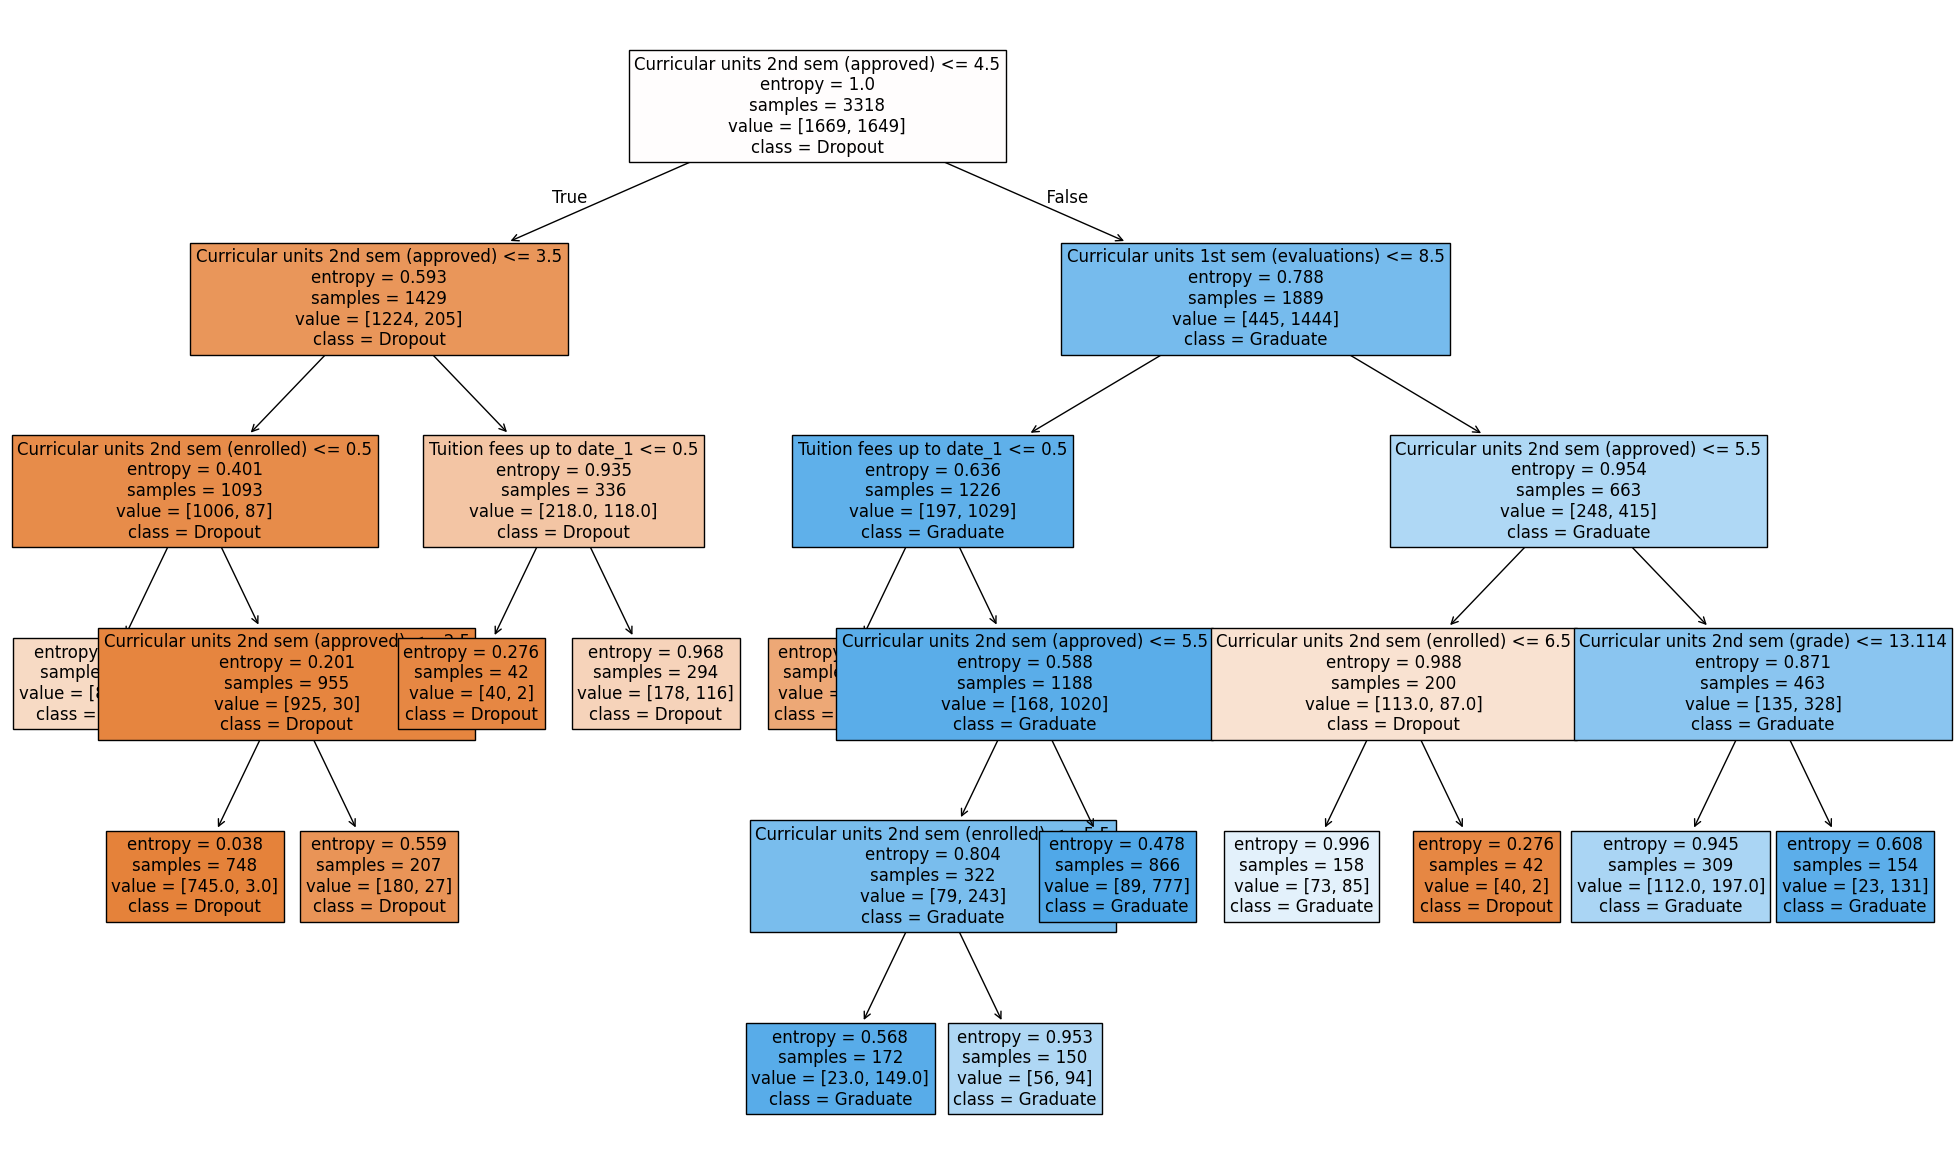

Cantidad total de nodos: 25
Cantidad de hojas: 13
Accuracy: 0.8318264014466547
F1 macro: 0.8308033951835767
Features mas importanes
Curricular units 2nd sem (approved) 0.7871278679696024
Curricular units 2nd sem (enrolled) 0.10472855450793625


In [28]:
ccp_path = arbol.cost_complexity_pruning_path(x_train, y_train , sample_weight=None)


print(ccp_path.ccp_alphas.shape)
#separo los alphas
ccp_alphas = ccp_path.ccp_alphas

ccp_alphas = ccp_alphas[:-1]

#vuelvo a definir el modelo pero con los alphas definidos


#defino mi modelo con un alpha significativo para ver la diferencia con el anterior
arbol_podado = DecisionTreeClassifier(criterion='entropy', ccp_alpha=0.005)
arbol_podado.fit(x_train, y_train)

#grafico
plt.figure(figsize=(25,15))
plot_tree(arbol_podado, feature_names=all_feature_names, class_names=['Dropout', 'Graduate'], filled=True , fontsize=12)
plt.show()
# Cantidad de nodos totales
num_nodos = arbol_podado.tree_.node_count

# Cantidad de hojas (nodos terminales)
num_hojas = sum(arbol_podado.tree_.children_left == -1) #si es -1 significa que no tiene hijos por lo que es una hoja

print("Cantidad total de nodos:" , num_nodos)
print("Cantidad de hojas:" , num_hojas)

#El árbol va recorriendo estas reglas hasta llegar a una hoja, y la clase asignada a esa hoja es la predicción para esa fila.
y_pred_podado = arbol_podado.predict(x_test) #predice Dropout o Graduate


f1_podado , acc_podado = calculo_merito(y_pred_podado, y_test)
print(f"Accuracy: {acc_podado}")
print(f"F1 macro: {f1_podado}")

# Feature importances
calculo_importantes(arbol_podado, all_feature_names)



La Feature Importance en un árbol de decisión mide cuánto contribuye cada variable a reducir la impureza del modelo, que en este caso se calcula con entropía, es decir que Cuanto más se utiliza una característica para dividir los datos en nodos más puros, mayor es su importancia.
Por lo tanto, las dos features más relevantes son aquellas que más influyen en la toma de decisiones del árbol y, por ende, en la predicción final.
Estas variables representan los factores que el modelo considera más determinantes para clasificar correctamente los casos según el criterio de entropía.

In [29]:
arboles_podados = []
num_hojas = []
f1_scores = []
accuracies = []

for alpha in ccp_alphas:
    arbol_podado_t = DecisionTreeClassifier(random_state=0, ccp_alpha=alpha)
    arbol_podado_t.fit(x_train, y_train)
    arboles_podados.append(arbol_podado_t)
    # contar hojas
    hojas = sum(arbol_podado_t.tree_.children_left == -1)
    num_hojas.append(hojas)
    y_pred_podado_t = arbol_podado_t.predict(x_test)
    f1 , acc = calculo_merito(y_pred_podado_t , y_test)
    f1_scores.append(f1)
    accuracies.append(acc)





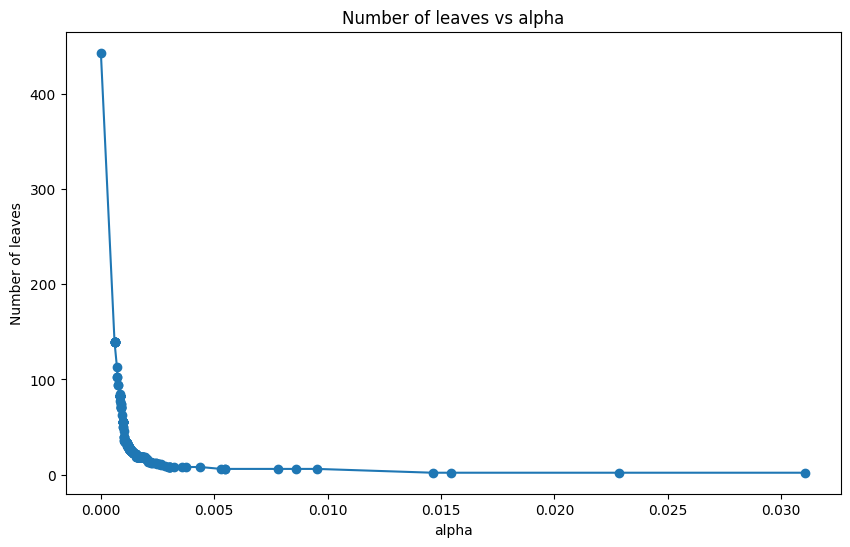

In [30]:

# Grafico la cantidad de hojas en funcion de α
plt.figure(figsize=(10,6))
plt.plot(ccp_alphas, num_hojas, marker='o')
plt.xlabel('alpha')
plt.ylabel('Number of leaves')
plt.title('Number of leaves vs alpha')
plt.show()

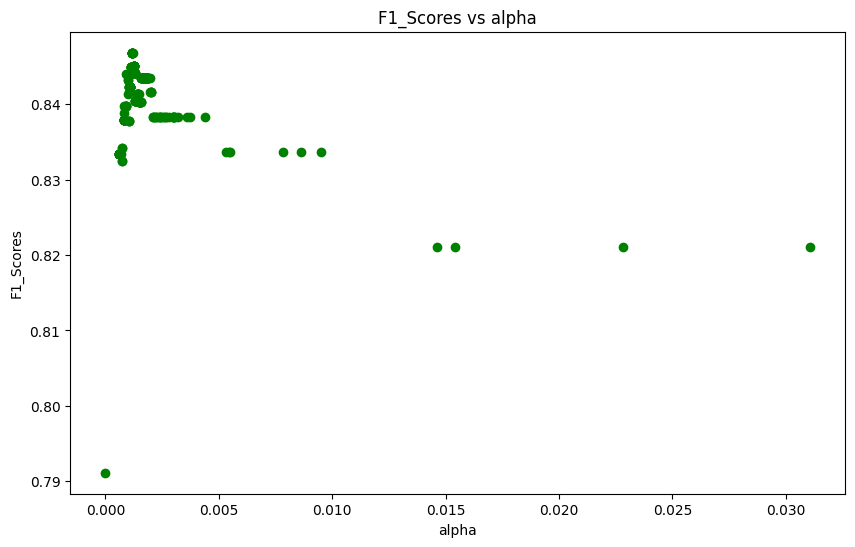

In [31]:
plt.figure(figsize=(10,6))
plt.plot(ccp_alphas, f1_scores , 'go')
plt.xlabel('alpha')
plt.ylabel('F1_Scores')
plt.title('F1_Scores vs alpha')
plt.show()

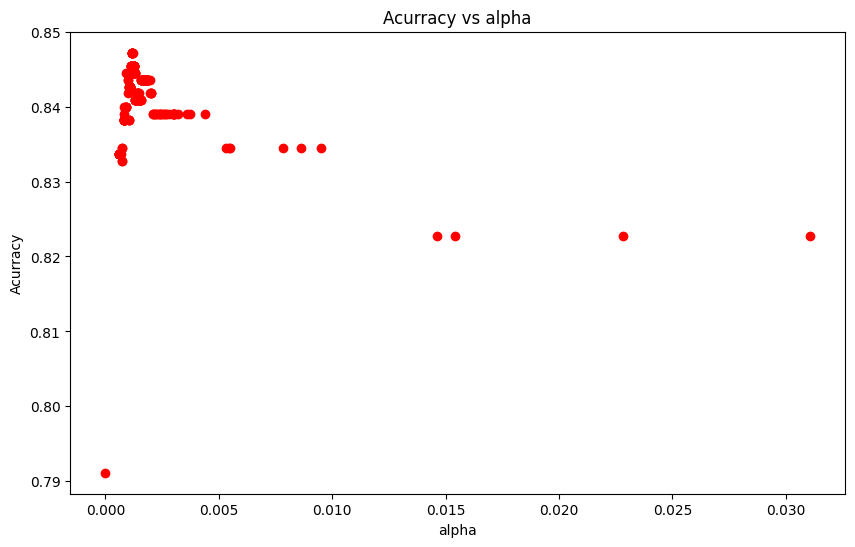

In [32]:
plt.figure(figsize=(10,6))
plt.plot(ccp_alphas, accuracies , 'ro')
plt.xlabel('alpha')
plt.ylabel('Acurracy')
plt.title('Acurracy vs alpha')
plt.show()

In [33]:
max_f1 = max(f1_scores)
max_f1_index = f1_scores.index(max_f1)
max_f1_alpha = ccp_alphas[max_f1_index]

arbol_max_f1 = arboles_podados[max_f1_index]

#features mas importantes
calculo_importantes(arbol_max_f1, all_feature_names)


Features mas importanes
Curricular units 2nd sem (approved) 0.7410951695095027
Tuition fees up to date_1 0.0582991251802268


In [34]:
arbol_random = RandomForestClassifier(n_estimators = 20 ,criterion = 'entropy')

arbol_random.fit(x_train, y_train)

y_pred_random = arbol_random.predict(x_test)


f1_r , acc_r = calculo_merito(y_pred_random, y_test)
print(f"Accuracy: {acc_r}")
print(f"F1 macro: {f1_r}")

calculo_importantes(arbol_random, all_feature_names)



Accuracy: 0.8580470162748643
F1 macro: 0.8580134707391245
Features mas importanes
Curricular units 2nd sem (approved) 0.14720237142138423
Curricular units 1st sem (approved) 0.08508173955127372


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


**Random Forest Classifier**

El **Random Forest** (bosque aleatorio) es un modelo de aprendizaje supervisado, que combina múltiples **árboles de decisión** para mejorar la precisión y reducir el sobreajuste.

En lugar de entrenar un solo árbol, el algoritmo construye **muchos árboles independientes**, cada uno entrenado con:
- Un subconjunto aleatorio de los datos (técnica *bootstrap*), es decir muestreo con remplazo, lo que permite crear múltiples versiones diferentes del conjunto de datos original
- Un subconjunto aleatorio de características para cada división.

Cada árbol genera su propia predicción, y el modelo final combina todas mediante **votación mayoritaria**.  
Por ejemplo, si tres árboles predicen:  [Dropout, Graduate, Dropout],
  
la predicción final será Dropout.


**Ventajas:**

- **Alta precisión:** al promediar los resultados de varios árboles, se obtiene un modelo más estable.  
- **Menor sobreajuste:** los errores individuales se compensan entre sí.  
- **Feature Importance:** permite identificar las variables más influyentes.  
- **Robustez:** Cada árbol aprende un patrón distinto, y la combinación de todos produce una predicción más confiable.  



